In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost 

In [13]:
#change the location first
Ref_case = pd.read_csv(r'E:\Thesis\transformerdata35\Ref_case_351.csv')
Site_case =pd.read_csv(r'E:\Thesis\transformerdata35\site case 35.csv')

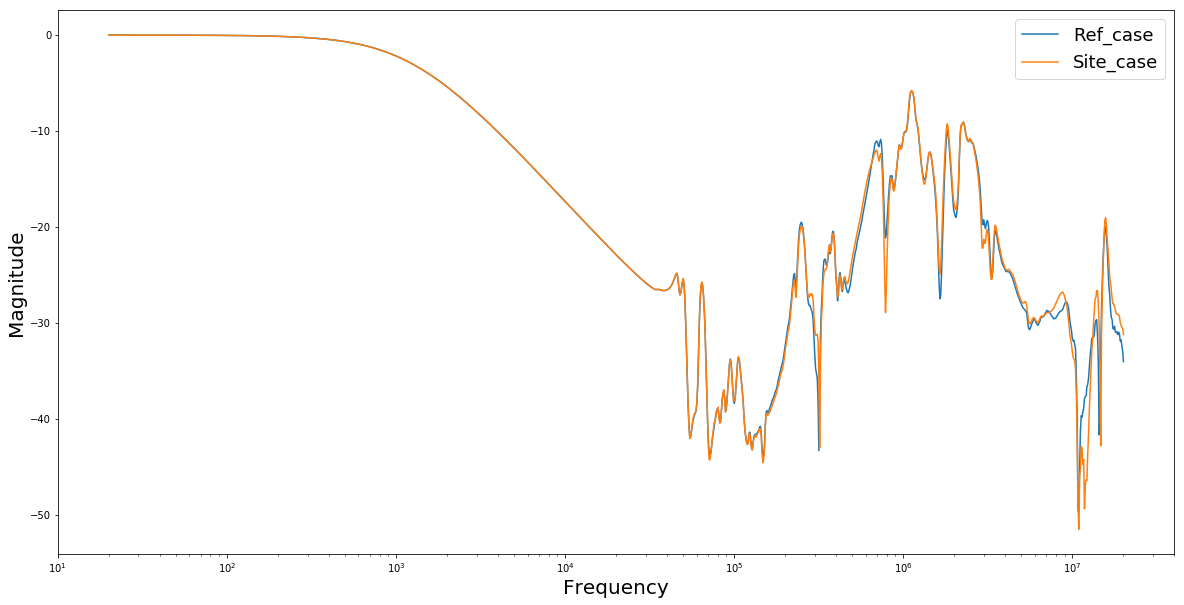

In [18]:
plt.figure(figsize=(20,10))
a=plt.plot(Ref_case['Freq'], Ref_case['Mag'], label='Ref_case')
b=plt.plot(Site_case['Freq'], Site_case['Mag'], label= 'Site_case')
plt.xscale('log')
plt.xlabel('Frequency', fontsize = 20)
plt.ylabel('Magnitude', fontsize = 20)
plt.legend(fontsize = 18)

In [4]:
Ref_case=np.array(Ref_case)
Site_case= np.array(Site_case)

In [5]:
case= np.vstack([Ref_case,Site_case])

In [6]:
case.shape

(2500, 2)

In [7]:
X = case[:, :2]
X

array([[ 2.00740000e+01, -3.46725110e-02],
       [ 2.02980000e+01, -3.46472640e-02],
       [ 2.05230000e+01, -3.38031990e-02],
       ...,
       [ 1.96351592e+07, -3.04881464e+01],
       [ 1.98535544e+07, -3.05639262e+01],
       [ 2.00743787e+07, -3.12433695e+01]])

X = X.reshape(-1,50)
X.shape

In [8]:
y = np.zeros((2500))
y

array([0., 0., 0., ..., 0., 0., 0.])

In [9]:
y[1250:] = 1

In [10]:
y.shape, y[1]

((2500,), 0.0)

In [11]:
y

array([0., 0., 0., ..., 1., 1., 1.])

In [160]:
X.shape, X[0]

((2500, 2), array([20.074     , -0.03467251]))

In [323]:
test_size= .20
seed= 6

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state=seed)

In [321]:
model = xgboost.XGBClassifier(learning_rate =0.0001, n_estimators=21, 
                        max_depth= 3, min_child_weight= 1, gamma=0.1,
                        nthread=1, scale_pos_weight=1 )
model.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.1, learning_rate=0.0001,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=21, n_jobs=1, nthread=1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
Accuracy: 52.20%


In [322]:
#predictions= clf.predict(X_test)
print(accuracy_score(y_test, predictions)*100,'%')
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

52.2 %
[[ 60 200]
 [ 39 201]]
              precision    recall  f1-score   support

         0.0       0.61      0.23      0.33       260
         1.0       0.50      0.84      0.63       240

   micro avg       0.52      0.52      0.52       500
   macro avg       0.55      0.53      0.48       500
weighted avg       0.56      0.52      0.47       500

